## importing tabular and numerical libraries

In [1]:
import numpy as np
import pandas as pd

## Reading the dataset

In [2]:
autos = pd.read_csv('autos.csv', encoding='Latin-1')

## Pre-visualizing the data

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

The dataset has some inconsistencies (```NaN```values) and apparently, columns that were supose to be numerical but are strings there.

## Verifying the column names

In [5]:
for column in autos.columns:
    print(column)

dateCrawled
name
seller
offerType
price
abtest
vehicleType
yearOfRegistration
gearbox
powerPS
model
odometer
monthOfRegistration
fuelType
brand
notRepairedDamage
dateCreated
nrOfPictures
postalCode
lastSeen


## Normalizing Columns names to snake case
Remember:
* ```ThiIsCammelCase```;
* ```this_is_snake_case```;

In [6]:
columns_new_names = {
    'dateCrawled': 'date_crawled',
    'name': 'name',
    'seller': 'seller',
    'offerType': 'offer_type',
    'price': 'price',
    'abtest': 'abtest',
    'vehicleType': 'vehicle_type',
    'yearOfRegistration': 'registration_year',
    'gearbox': 'gearbox',
    'powerPS': 'power_ps',
    'model': 'model',
    'odometer': 'odometer',
    'monthOfRegistration': 'registration_month',
    'fuelType': 'fuel_type',
    'brand': 'brand',
    'notRepairedDamage': 'unrepaired_damage',
    'dateCreated': 'ad_created',
    'nrOfPictures': 'nr_of_pictures',
    'postalCode': 'postal_code',
    'lastSeen': 'last_seen'
}

autos.rename(columns=columns_new_names, inplace=True)

## Visualizing some statistics metrics

In [7]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-16 21:50:53,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


## Dealing with the suspicious columns
Some of the columns have almost all values the same or assuming very few values. Thus, it is necessary to investigate this by visualizing which values they assume (and if they are relevant somehow).

Here, the suspicious columns are:
    ```seller```, ```offer_type```, ```abtest```, ```gearbox``` and ```unrepaired_damage```

In [8]:
suspicious_columns = ['seller', 'offer_type', 'abtest', 'gearbox', 'unrepaired_damage']
for column in autos[suspicious_columns]:
    print(column, '-> ', autos[column].value_counts().to_dict())

seller ->  {'privat': 49999, 'gewerblich': 1}
offer_type ->  {'Angebot': 49999, 'Gesuch': 1}
abtest ->  {'test': 25756, 'control': 24244}
gearbox ->  {'manuell': 36993, 'automatik': 10327}
unrepaired_damage ->  {'nein': 35232, 'ja': 4939}


In [9]:
# dropping unecessary columns
autos.drop(columns=['seller', 'offer_type'], inplace=True)

## Converting the ```unrepaired_damage``` column german names to its english counterparts
The mapping is: *nein* -> *no* and *ja* -> *yes*

In [10]:
autos['unrepaired_damage'].replace({'nein': 'no', 'ja': 'yes'}, inplace=True)

## Converting the numeric data stored as text
These are the ones found on ```price``` and ```odometer``` columns. They need to be filtered, removing the unecessary text characters, and then converted to the adequate numeric value.

In [11]:
autos['price'].replace(['\$', ','], '', regex=True, inplace=True)
autos['price'] = [float(price) for price in autos.price]

autos['odometer'].replace([',', 'km'], '', regex=True, inplace=True)
autos['odometer'] = [float(distance) for distance in autos.odometer]

Then, the column ```odometer``` will be renamed to ```odometer_km```

In [12]:
autos.rename(columns={'odometer': 'odometer_km'}, inplace=True)

## Visualizing the dataset after alterations

In [13]:
autos.head()

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000.0,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,no,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,no,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,no,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350.0,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,no,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350.0,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,no,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [14]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date_crawled        50000 non-null  object 
 1   name                50000 non-null  object 
 2   price               50000 non-null  float64
 3   abtest              50000 non-null  object 
 4   vehicle_type        44905 non-null  object 
 5   registration_year   50000 non-null  int64  
 6   gearbox             47320 non-null  object 
 7   power_ps            50000 non-null  int64  
 8   model               47242 non-null  object 
 9   odometer_km         50000 non-null  float64
 10  registration_month  50000 non-null  int64  
 11  fuel_type           45518 non-null  object 
 12  brand               50000 non-null  object 
 13  unrepaired_damage   40171 non-null  object 
 14  ad_created          50000 non-null  object 
 15  nr_of_pictures      50000 non-null  int64  
 16  post

## Continuing on the study of the ```price``` and ```odometer_km``` columns
Here, we are going to investigate the values of these columns looking for abnormalities (since both of then, given their physical and economical interpretation, are sucessitible to "errors", such as **outliers**)

In [15]:
print('price unique values: ', autos['price'].nunique())
print('odometer_km unique values: ', autos['odometer_km'].nunique())

price unique values:  2357
odometer_km unique values:  13


In [16]:
price_describe = autos['price'].describe()
odometer_km_describe = autos['odometer_km'].describe()

pd.concat([price_describe, odometer_km_describe], axis=1)

,price,odometer_km
count,5.000000e+04,50000.000000
mean,9.840044e+03,125732.700000
std,4.811044e+05,40042.211706
min,0.000000e+00,5000.000000
25%,1.100000e+03,125000.000000
50%,2.950000e+03,150000.000000
75%,7.200000e+03,150000.000000
max,1.000000e+08,150000.000000


Now, we can see that, for the price, there are some very strange and grotesque variations. It says that the maximum value for a car that is being sold is \\$100.000.000, and the minimum is \\$0

In [17]:
autos['price'].value_counts().sort_index(ascending=False).head(20)

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
350000.0      1
345000.0      1
299000.0      1
295000.0      1
265000.0      1
259000.0      1
250000.0      1
220000.0      1
198000.0      1
197000.0      1
Name: price, dtype: int64

In [18]:
autos['price'].value_counts().sort_index(ascending=True).head(20)

0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
13.0       2
14.0       1
15.0       2
17.0       3
18.0       1
20.0       4
25.0       5
29.0       1
30.0       7
35.0       1
Name: price, dtype: int64

Here we can see that the values that we want to remove are the \$0's and the super big ones (bigger than \$350000.0)

In [19]:
# remove outliers
autos = autos[autos['price'].between(1.0, 350000.0)]

Let's investigate if the same applies to the ```odometer_km ```

In [20]:
autos['odometer_km'].value_counts().sort_index()

5000.0        836
10000.0       253
20000.0       762
30000.0       780
40000.0       815
50000.0      1012
60000.0      1155
70000.0      1217
80000.0      1415
90000.0      1734
100000.0     2115
125000.0     5057
150000.0    31414
Name: odometer_km, dtype: int64

As we can see, there's no abnormalities

## Treating the ```dates``` columns


<AxesSubplot:>

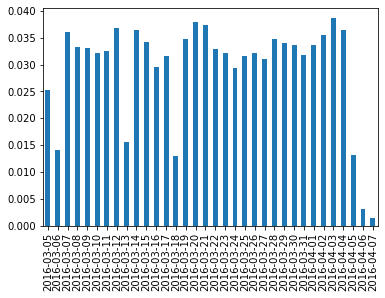

In [21]:
autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index().plot.bar()

Observing this plot, we can see that, since ```date_crawled``` corresponds to the date when a given car's add was first  crawled, they were more or less uniform over time.

<AxesSubplot:>

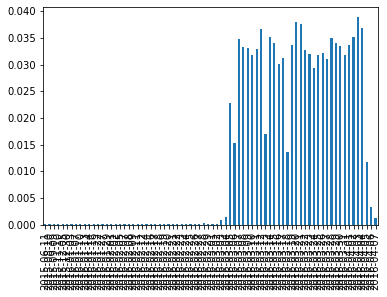

In [22]:
autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index().plot.bar()

Here we can see that the adds were mostly created on 2016

<AxesSubplot:>

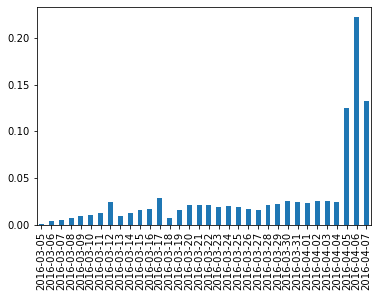

In [23]:
autos['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_index().plot.bar()

As we can see, the crawler saw this add last online on the 3 last days of the recorded data on the dataset.

## Filtering the ```registration_year```
Since the ```registration_year``` has a real relationship with the use of the cars, then, it does not make sense the situations where it is enormous (as 9999, since it is a time that not even have happened) or too old (since cars not even existed then).

In [24]:
autos['registration_year'].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

Verifying for the oldest registration years

In [25]:
autos['registration_year'].value_counts().sort_index(ascending=True).head(15)

1000    1
1001    1
1111    1
1800    2
1910    5
1927    1
1929    1
1931    1
1934    2
1937    4
1938    1
1939    1
1941    2
1943    1
1948    1
Name: registration_year, dtype: int64

Verifying for the most recent registration years

In [26]:
autos['registration_year'].value_counts(normalize=True).sort_index().tail(40)

1990    0.007145
1991    0.006980
1992    0.007619
1993    0.008751
1994    0.012952
1995    0.025265
1996    0.028271
1997    0.040173
1998    0.048656
1999    0.059652
2000    0.064985
2001    0.054278
2002    0.051189
2003    0.055575
2004    0.055657
2005    0.060455
2006    0.054978
2007    0.046886
2008    0.045609
2009    0.042932
2010    0.032719
2011    0.033419
2012    0.026974
2013    0.016535
2014    0.013652
2015    0.008072
2016    0.025121
2017    0.028663
2018    0.009678
2019    0.000041
2800    0.000021
4100    0.000021
4500    0.000021
4800    0.000021
5000    0.000082
5911    0.000021
6200    0.000021
8888    0.000021
9000    0.000021
9999    0.000062
Name: registration_year, dtype: float64

In [27]:
# remove outliers (between 1900-2016)
autos = autos[autos['registration_year'].between(1910, 2016)]

## Agregating the ```brands```
The criteria that is being used here is to aggregate the ```brands``` by two forms: first by the ```price```, and then by the ```odometer_km```. Only the information of the first 20 most popular car brands will be relevant for us.

In [28]:
# first 20 is the criteria
brand_list = autos['brand'].value_counts().head(20).index
print(brand_list)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'nissan', 'mazda', 'smart',
       'citroen', 'toyota', 'hyundai', 'sonstige_autos', 'volvo', 'mini'],
      dtype='object')


In [29]:
dictionary_cars_brand = {}
dictinary_odometer_mean = {}
for brand in brand_list:
    dictionary_cars_brand[brand] = autos[autos['brand'] == brand]['price'].mean()
    dictinary_odometer_mean[brand] = autos[autos['brand'] == brand]['odometer_km'].mean()

In [30]:
dictionary_cars_brand

{'volkswagen': 5402.410261610221,
 'bmw': 8332.820517811953,
 'opel': 2975.2419354838707,
 'mercedes_benz': 8628.450366422385,
 'audi': 9336.687453600594,
 'ford': 3749.4695065890287,
 'renault': 2474.8646069968195,
 'peugeot': 3094.0172290021537,
 'fiat': 2813.748538011696,
 'seat': 4397.230949589683,
 'skoda': 6368.0,
 'nissan': 4743.40252454418,
 'mazda': 4112.596614950635,
 'smart': 3580.2239031770046,
 'citroen': 3779.1391437308866,
 'toyota': 5167.091062394604,
 'hyundai': 5365.254273504273,
 'sonstige_autos': 12338.550218340612,
 'volvo': 4946.501170960188,
 'mini': 10613.459657701711}

In [43]:
mean_brand_price = pd.Series(dictionary_cars_brand)
mean_odometer_km = pd.Series(dictinary_odometer_mean)

dataframe_brand = pd.DataFrame(mean_brand_price, columns = ['mean_price'])
dataframe_brand.head()

,mean_price
volkswagen,5402.410262
bmw,8332.820518
opel,2975.241935
mercedes_benz,8628.450366
audi,9336.687454


In [44]:

dataframe_brand['mean_odometer_km'] = mean_odometer_km
dataframe_brand.head()

,mean_price,mean_odometer_km
volkswagen,5402.410262,128707.158791
bmw,8332.820518,132572.513140
opel,2975.241935,129310.035842
mercedes_benz,8628.450366,130788.363313
audi,9336.687454,129157.386785
